### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [78]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import time


In [79]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  
y = iris.target  

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [81]:
def Train_test_splitter(X,y,train_size = 0.7):
    a = np.arange(0,len(X),1)
    np.random.shuffle(a)
    a_train = a[0:int(train_size*len(X))]
    a_test = a[len(a_train):len(a)]

    X_train = X[a_train]
    X_test = X[a_test]
    y_train = y[a_train]
    y_test = y[a_test]
    return X_train,X_test, y_train,y_test

In [82]:
X_train, X_test, y_train, y_test = Train_test_splitter(X, y, train_size=0.7)

In [83]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [84]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1
    

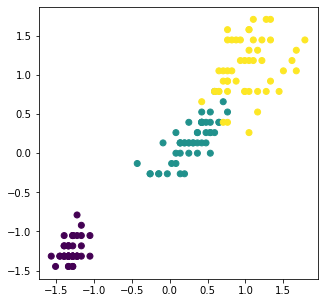

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [86]:
class LogisticRegression:
    def __init__(self, alpha=0.001, max_iter= 10000, 
            loss_old=10000, tol=1e-3, method="batch",batch_size = 100):
        
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = 10000
        self.tol = tol
        self.method = method
        self.batch_size = batch_size
        
    def gradient(self,X,y):
        m = X.shape[0]
        h = self.h_theta(X)
        cost = - np.sum(y*np.log(h)) / m
        self.error = h - y
        grad = self.softmax_grad(X)
        return cost, grad    
    
    def h_theta(self, X):
        return self.softmax(X @ self.w)
    
    def softmax(self,x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
    def softmax_grad(self, X):
        return  X.T @ self.error
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test), axis=1)
        
    def fit(self,X,y):
        rand_idx=[]
        self.w = np.random.rand(X.shape[1], y.shape[1])
        self.loss = []
        self.iter = []
        
        for j in range(self.max_iter):
            start_time = time.time()
            if self.method == 'batch':
                cost, grad =  self.gradient(X, y)
                self.w = self.w - self.alpha * grad
                self.loss.append(cost)
                self.iter.append(j)
                if j % 500 == 0:
                    print(f"Cost at iteration {j}", cost)
                    end_time = time.time()
                    print(f"Time taken for batch {end_time - start_time}")
            elif self.method == 'sto':
                a = np.random.randint(X.shape[0])
                for j in rand_idx:
                    a= np.random.randint(X.shape[0])
                    
                X_stoc = X[a,:].reshape(1,-1)
                y_stoc = y[a]

                cost, grad = self.gradient(X_stoc, y_stoc)
                self.loss.append(cost)
                
                self.w = self.w - self.alpha * grad
                rand_idx.append(j)
                
                if len(rand_idx) == X.shape[0]:
                    rand_idx = []
                
                if j % 500 == 0:
                    print(f"Cost at iteration {j}", cost)
                        
                    end_time = time.time()
                    print(f"Time taken for batch {end_time - start_time}")        
                    
            elif self.method == 'mini': #for stochastic method
                j= np.random.randint(X.shape[0])
                X_new = X[j : j + self.batch_size]
                y_new = y[j : j + self.batch_size]
                cost, grad = self.gradient(X_new, y_new) 
                self.loss.append(cost)
                self.w = self.w - self.alpha * grad
                if j % 500 == 0:
                    print(f"Cost at iteration {j}", cost)
                    end_time = time.time()
                    print(f"Time taken for batch {end_time - start_time}")
            else:
                raise ValueError('Input method must be as "batch", "mini" or "sto".')
        
    def plot(self):
        plt.plot(np.arange(len(self.loss)) , self.loss, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Cost at iteration 0 1.2398448617351794
Time taken for batch 0.000640869140625
Cost at iteration 500 0.17285216958713648
Time taken for batch 0.00023031234741210938
Cost at iteration 1000 0.12751079428207515
Time taken for batch 0.00013971328735351562
Cost at iteration 1500 0.10902291416283899
Time taken for batch 0.000141143798828125
Cost at iteration 2000 0.09850985538620674
Time taken for batch 0.00010061264038085938
Cost at iteration 2500 0.09152928842145405
Time taken for batch 9.775161743164062e-05
Cost at iteration 3000 0.08646326558833684
Time taken for batch 9.632110595703125e-05
Cost at iteration 3500 0.08257065852915822
Time taken for batch 9.512901306152344e-05
Cost at iteration 4000 0.07945911640399055
Time taken for batch 9.870529174804688e-05
Cost at iteration 4500 0.0768990068582478
Time taken for batch 0.00025391578674316406
Cost at iteration 5000 0.07474566509783101
Time taken for batch 0.00010085105895996094
Cost at iteration 5500 0.07290269518195436
Time taken for ba

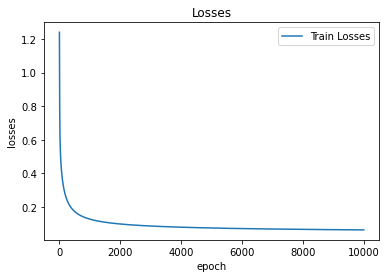

In [87]:
model = LogisticRegression( method = 'batch')
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iteration 0 1.4139702709026496
Time taken for batch 0.0003139972686767578
Cost at iteration 0 1.3225722756925922
Time taken for batch 0.0001285076141357422
Cost at iteration 0 0.7201355415089268
Time taken for batch 0.00012183189392089844
Cost at iteration 0 0.6715546611934775
Time taken for batch 0.00012755393981933594
Cost at iteration 0 0.6636145821994238
Time taken for batch 0.00013017654418945312
Cost at iteration 0 0.7064983951738771
Time taken for batch 0.00016570091247558594
Cost at iteration 0 1.5100064989952648
Time taken for batch 0.00014066696166992188
Cost at iteration 0 1.4510910025612116
Time taken for batch 0.00022149085998535156
Cost at iteration 0 0.7454334581723239
Time taken for batch 0.00015306472778320312
Cost at iteration 0 0.7444199324681132
Time taken for batch 0.000152587890625
Cost at iteration 0 0.6741666426509945
Time taken for batch 0.000156402587890625
Cost at iteration 0 1.5156623601782546
Time taken for batch 0.00015974044799804688
Cost at itera

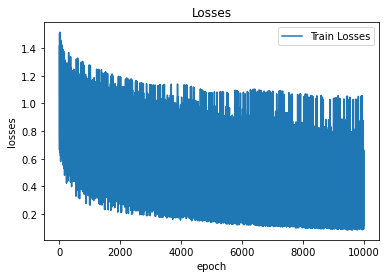

In [88]:
model = LogisticRegression( method = 'sto')
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iteration 0 0.7011930842974635
Time taken for batch 0.00035643577575683594
Cost at iteration 0 0.38788865984405374
Time taken for batch 0.0002834796905517578
Cost at iteration 0 0.371530883705314
Time taken for batch 0.00017595291137695312
Cost at iteration 0 0.33586279648371586
Time taken for batch 0.0001285076141357422
Cost at iteration 0 0.3345334890171535
Time taken for batch 0.00011754035949707031
Cost at iteration 0 0.3211312451416832
Time taken for batch 0.0001876354217529297
Cost at iteration 0 0.31023237709721185
Time taken for batch 0.00018787384033203125
Cost at iteration 0 0.28639279385523997
Time taken for batch 0.0001952648162841797
Cost at iteration 0 0.2654791406751982
Time taken for batch 0.000133514404296875
Cost at iteration 0 0.2522857161617136
Time taken for batch 0.00013017654418945312
Cost at iteration 0 0.18892841963276166
Time taken for batch 0.00015854835510253906
Cost at iteration 0 0.15675408535891894
Time taken for batch 0.0002288818359375
Cost at i

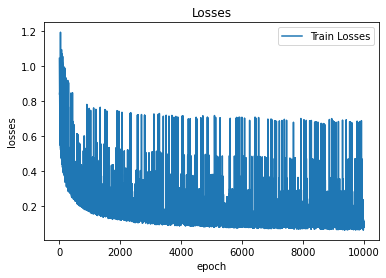

In [89]:
model = LogisticRegression( method = 'mini')
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

In [90]:
model = LogisticRegression( method = 'anupam')
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

ValueError: Input method must be as "batch", "mini" or "sto".

Here, we compute Logistic regression for iris data set using batch, stochastic gradient descent, and mini batch method. <br /> The batch method was used first, where we can see that loss curve is smooth and almost equal to zero. We can stop iteration early since after 1000 iteration loss is almost constant. The time take for batch method is 9.96589e-05. <br />
In SGD, we can see the loss curve is not stable and moving up and down. The reason is because we use one sample for training. The time take for SGD method is 0.000638. <br />
In mini batch method, the loss curve is less stable than SGD, but still oscillating and not smooth as batch method since we used a subset of samples to estimate the loss and gradient in mini batch. The time take for mini batch method is 0.000107.<br />
We can say that in this data set, the fastest method is batch method followed by mini batch and SGD method. We also used method name anupam which give us value error and remind us we only have three method for input.
